In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Check the AQI data

In [95]:
aqi= pd.read_csv('Asthma/Data/corrected/AQI_byCountyYear.csv')

In [7]:
aqi.head()

,County,Year,# Days with AQI,Good,Moderate,Unhealthy for Sensitive Groups,Unhealthy,Very Unhealthy,AQI Maximum,AQI 90th Percentile,AQI Median,# Days CO,# Days NO2,# Days O3,# Days SO2,# Days PM2.5,# Days PM10
0,Alameda,2016,305.0,205.0,88.0,11.0,1.0,0.0,154.0,72.0,44.0,0.0,4.0,187.0,0.0,114.0,0.0
1,Alpine,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Amador,2016,121.0,118.0,3.0,0.0,0.0,0.0,58.0,41.0,33.0,0.0,0.0,121.0,0.0,0.0,0.0
3,Butte,2016,236.0,191.0,45.0,0.0,0.0,0.0,100.0,56.0,38.0,0.0,0.0,70.0,0.0,166.0,0.0
4,Calaveras,2016,121.0,111.0,10.0,0.0,0.0,0.0,71.0,49.0,37.0,0.0,0.0,73.0,0.0,48.0,0.0


In [11]:
aqi.columns

Index([u'County', u'Year', u'# Days with AQI', u'Good', u'Moderate',
       u'Unhealthy for Sensitive Groups', u'Unhealthy', u'Very Unhealthy',
       u'AQI Maximum', u'AQI 90th Percentile', u'AQI Median', u'# Days CO',
       u'# Days NO2', u'# Days O3', u'# Days SO2', u'# Days PM2.5',
       u'# Days PM10'],
      dtype='object')

In [96]:
aqi.describe()

,Year,# Days with AQI,Good,Moderate,Unhealthy for Sensitive Groups,Unhealthy,Very Unhealthy,AQI Maximum,AQI 90th Percentile,AQI Median,# Days CO,# Days NO2,# Days O3,# Days SO2,# Days PM2.5,# Days PM10
count,986.000000,908.000000,908.00000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,2008.000000,341.705947,200.55837,103.027533,27.306167,9.269824,1.544053,358.590308,90.972467,48.545705,0.713656,16.797357,220.953744,1.029736,88.788546,13.422907
std,4.901466,66.671044,91.97779,61.243584,29.752023,18.086674,4.815131,1384.239075,38.182543,18.947131,4.393484,29.097159,98.005502,10.846336,73.128946,40.415477
min,2000.000000,2.000000,2.00000,0.000000,0.000000,0.000000,0.000000,21.000000,21.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,363.000000,129.50000,57.750000,2.750000,0.000000,0.000000,122.000000,61.000000,38.000000,0.000000,0.000000,172.000000,0.000000,20.000000,0.000000
50%,2008.000000,365.000000,210.50000,102.000000,16.000000,1.000000,0.000000,157.500000,87.000000,44.000000,0.000000,1.000000,227.500000,0.000000,79.000000,2.000000
75%,2012.000000,365.000000,268.00000,147.250000,42.250000,8.250000,0.000000,197.000000,113.000000,55.000000,0.000000,21.000000,291.000000,0.000000,143.000000,8.000000
max,2016.000000,366.000000,360.00000,275.000000,127.000000,114.000000,51.000000,20646.000000,208.000000,126.000000,78.000000,217.000000,366.000000,166.000000,342.000000,350.000000


Something wrong in the AQI maximum

In [27]:
print aqi['AQI Maximum'].max()

20646.0


Counties that have AQI maximum values over 5000

In [68]:
print np.unique(aqi.loc[aqi['AQI Maximum']>5000]['County'])

['Inyo' 'Mono']


In [44]:
aqimax_inyo= aqi.loc[aqi['County']=='Inyo',['Year','AQI Maximum']]
aqimax_mono= aqi.loc[aqi['County']=='Mono',['Year','AQI Maximum']]

In [46]:
aqimax_NOT= aqi.loc[np.logical_and(aqi['County']!='Inyo',aqi['County']!='Mono'),'AQI Maximum']

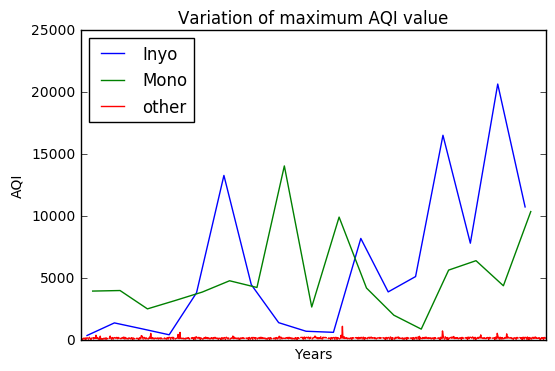

In [53]:
aqimax_inyo['AQI Maximum'].plot(label='Inyo')
aqimax_mono['AQI Maximum'].plot(label='Mono')
aqimax_NOT.plot(label='other')
plt.ylabel('AQI')
plt.xlabel('Years')
plt.xticks([])
plt.title('Variation of maximum AQI value')
plt.legend(loc='best')

We better remove the maximum AQI measurement

### Normalize the number of days

In [81]:
Ncols= len(aqi.columns)
print 'Number of columns: %d' % Ncols
aqi.columns

Number of columns: 17


Index([u'County', u'Year', u'# Days with AQI', u'Good', u'Moderate',
       u'Unhealthy for Sensitive Groups', u'Unhealthy', u'Very Unhealthy',
       u'AQI Maximum', u'AQI 90th Percentile', u'AQI Median', u'# Days CO',
       u'# Days NO2', u'# Days O3', u'# Days SO2', u'# Days PM2.5',
       u'# Days PM10'],
      dtype='object')

In [97]:
inds=[3,4,5,6,7,11,12,13,14,15,16]
print aqi.columns[inds]

Index([u'Good', u'Moderate', u'Unhealthy for Sensitive Groups', u'Unhealthy',
       u'Very Unhealthy', u'# Days CO', u'# Days NO2', u'# Days O3',
       u'# Days SO2', u'# Days PM2.5', u'# Days PM10'],
      dtype='object')


In [98]:
for i in inds:
    s= 1.*aqi.iloc[:,i]/aqi['# Days with AQI']
    aqi.iloc[:,i]= s

In [101]:
aqi.head()

,County,Year,# Days with AQI,Good,Moderate,Unhealthy for Sensitive Groups,Unhealthy,Very Unhealthy,AQI Maximum,AQI 90th Percentile,AQI Median,# Days CO,# Days NO2,# Days O3,# Days SO2,# Days PM2.5,# Days PM10
0,Alameda,2016,305.0,0.672131,0.288525,0.036066,0.003279,0.0,154.0,72.0,44.0,0.0,0.013115,0.613115,0.0,0.373770,0.0
1,Alpine,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Amador,2016,121.0,0.975207,0.024793,0.000000,0.000000,0.0,58.0,41.0,33.0,0.0,0.000000,1.000000,0.0,0.000000,0.0
3,Butte,2016,236.0,0.809322,0.190678,0.000000,0.000000,0.0,100.0,56.0,38.0,0.0,0.000000,0.296610,0.0,0.703390,0.0
4,Calaveras,2016,121.0,0.917355,0.082645,0.000000,0.000000,0.0,71.0,49.0,37.0,0.0,0.000000,0.603306,0.0,0.396694,0.0


### Remove Columns 2 and 8

In [102]:
inds=[2,8]
aqi.columns[inds]

Index([u'# Days with AQI', u'AQI Maximum'], dtype='object')

In [115]:
cols=range(Ncols)
for i in inds:
    cols.remove(i)
print cols

[0, 1, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16]


In [110]:
a.remove(inds[1])
a

[0, 1, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16]

In [116]:
new_aqi= aqi.reindex(columns=aqi.columns[cols])

In [117]:
new_aqi

,County,Year,Good,Moderate,Unhealthy for Sensitive Groups,Unhealthy,Very Unhealthy,AQI 90th Percentile,AQI Median,# Days CO,# Days NO2,# Days O3,# Days SO2,# Days PM2.5,# Days PM10
0,Alameda,2016,0.672131,0.288525,0.036066,0.003279,0.000000,72.0,44.0,0.000000,0.013115,0.613115,0.000000,0.373770,0.000000
1,Alpine,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Amador,2016,0.975207,0.024793,0.000000,0.000000,0.000000,41.0,33.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3,Butte,2016,0.809322,0.190678,0.000000,0.000000,0.000000,56.0,38.0,0.000000,0.000000,0.296610,0.000000,0.703390,0.000000
4,Calaveras,2016,0.917355,0.082645,0.000000,0.000000,0.000000,49.0,37.0,0.000000,0.000000,0.603306,0.000000,0.396694,0.000000
5,Colusa,2016,0.876984,0.123016,0.000000,0.000000,0.000000,51.0,34.0,0.000000,0.000000,0.305556,0.000000,0.682540,0.011905
6,Contra Costa,2016,0.809836,0.180328,0.009836,0.000000,0.000000,59.0,40.0,0.000000,0.000000,0.675410,0.000000,0.324590,0.000000
7,Del Norte,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,El Dorado,2016,0.867769,0.132231,0.000000,0.000000,0.000000,54.0,41.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
9,Fresno,2016,0.334328,0.441791,0.194030,0.029851,0.000000,126.0,63.0,0.000000,0.000000,0.677612,0.000000,0.262687,0.059701


### Some graphs

([], <a list of 0 Text xticklabel objects>)

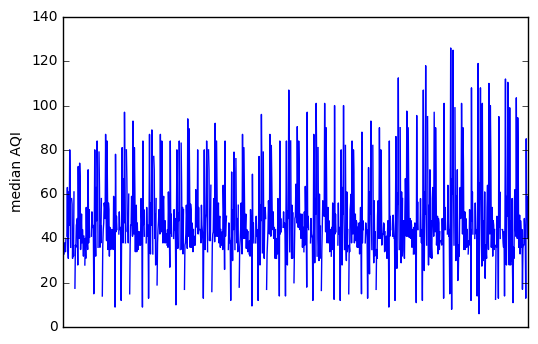

In [125]:
new_aqi['AQI Median'].plot()
plt.ylabel('median AQI')
# plt.xlabel('stations & year')
plt.xticks([])

In [143]:
inds1= new_aqi['County']=='Los Angeles'
inds2= new_aqi['County']=='Trinity'
inds3= new_aqi['County']=='Napa'

In [149]:
new_aqi_1= new_aqi.loc[inds1]
new_aqi_2= new_aqi.loc[inds2]
new_aqi_3= new_aqi.loc[inds3]

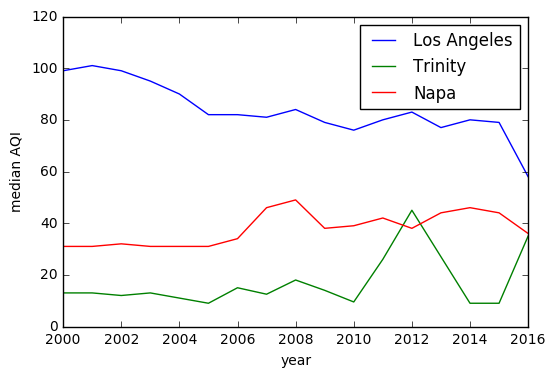

In [156]:
plt.plot(new_aqi_1['Year'],new_aqi_1['AQI Median'],label=new_aqi_1.iat[0,0])
plt.plot(new_aqi_2['Year'],new_aqi_2['AQI Median'],label=new_aqi_2.iat[0,0])
plt.plot(new_aqi_3['Year'],new_aqi_3['AQI Median'],label=new_aqi_3.iat[0,0])
plt.legend(loc='best')
plt.ylabel('median AQI')
plt.xlabel('year')

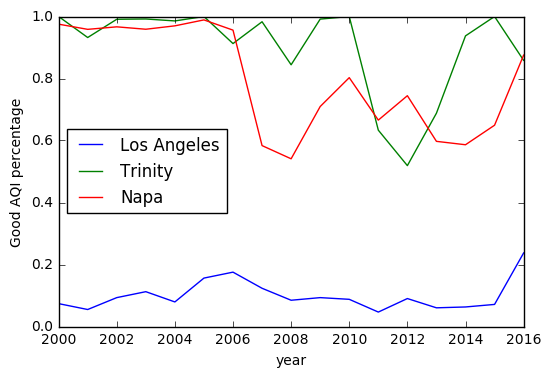

In [158]:
plt.plot(new_aqi_1['Year'],new_aqi_1['Good'],label=new_aqi_1.iat[0,0])
plt.plot(new_aqi_2['Year'],new_aqi_2['Good'],label=new_aqi_2.iat[0,0])
plt.plot(new_aqi_3['Year'],new_aqi_3['Good'],label=new_aqi_3.iat[0,0])
plt.legend(loc='best')
plt.ylabel('Good AQI percentage')
plt.xlabel('year')

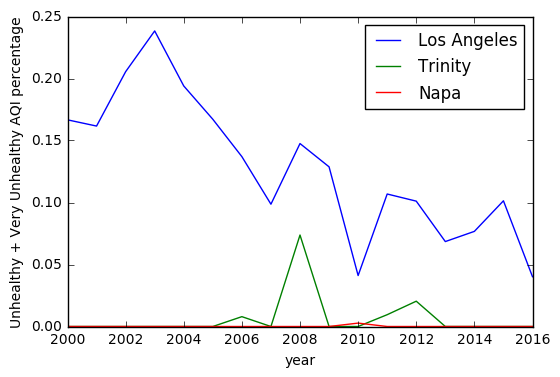

In [197]:
plt.plot(new_aqi_1['Year'],new_aqi_1[['Unhealthy','Very Unhealthy']].sum(axis=1),label=new_aqi_1.iat[0,0])
plt.plot(new_aqi_2['Year'],new_aqi_2[['Unhealthy','Very Unhealthy']].sum(axis=1),label=new_aqi_2.iat[0,0])
plt.plot(new_aqi_3['Year'],new_aqi_3[['Unhealthy','Very Unhealthy']].sum(axis=1),label=new_aqi_3.iat[0,0])
plt.legend(loc='best')
plt.ylabel('Unhealthy + Very Unhealthy AQI percentage')
plt.xlabel('year')

### Save file

In [198]:
new_aqi.to_csv('AQI.csv')